In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch

import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd

import ast

import FullRankRNN as rnn
import Reinforce as rln

/home/martina/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
clsf_on_actor = False

if clsf_on_actor:
    with open("relevant_neurons_actor.txt", 'r') as file:
        file_content = file.read()
else:
    with open("relevant_neurons_critic.txt", 'r') as file:
        file_content = file.read()

parsed_content = ast.literal_eval(file_content)

relevant_neurons = np.asarray(parsed_content)
print(relevant_neurons)

[ 68  91  98  47   7  46   9  15  55 114]


In [3]:
collection1 = new_vector = np.zeros((len(relevant_neurons), 1))
#x_values = []
#pair = []

reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                          name_load_critic="models/RL_critic_network_good.pt")

iterations = 100
observations, rewards, actions,\
log_action_probs, entropies, values,\
trial_begins, errors, frates, time_av_values_col, \
final_actions, global_values = reinforce.experience(iterations)

iteration 100


In [4]:
x_values = global_values

a_frates=frates

df = pd.DataFrame(a_frates)
display(df)

new_vector = np.zeros((len(relevant_neurons), 1))
a_frates_rid = a_frates[relevant_neurons]
#a_frates_rid = a_frates_rid.T

#df = pd.DataFrame(a_frates_rid)
#df.index = [relevant_neurons]
#display(df)

#a_frates_rid = a_frates_rid.mean(axis=1)
#new_vector[:,0] = a_frates_rid
#collection1 = np.concatenate((collection1, new_vector), axis=1)

#collection1 = collection1[:, 1:]

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.026995,0.068333,0.000000,0.013632,0.004701,0.005175,0.068333,0.082756,0.035116,0.000000,...,0.000000,0.034636,0.262095,0.004578,0.007114,0.000000,0.204952,0.008806,0.000000,0.000000
1,2.290016,0.016672,2.661255,0.662595,4.228282,5.014031,0.016672,0.470730,0.365854,2.804093,...,6.996949,0.237982,0.008134,1.838225,4.741751,6.716737,0.149894,0.306370,7.153907,4.460514
2,1.907615,1.917160,1.721577,1.914678,1.519773,1.554863,1.917160,2.091956,1.959947,1.594941,...,1.349554,1.941846,2.185075,1.590423,1.570866,1.165872,2.103203,1.689458,1.234643,1.562778
3,0.480192,0.000000,1.451631,1.779285,0.416889,2.029802,0.000000,1.169045,0.878365,1.745383,...,2.056462,0.000000,1.167081,0.000000,1.532637,1.132772,0.543896,0.000000,2.270966,0.936968
4,2.011773,5.659508,6.377402,6.753314,1.386657,2.138538,5.659508,4.886869,4.655345,6.565281,...,1.734826,3.671413,6.972850,3.576538,1.799697,1.460064,4.555251,5.577581,1.937155,3.754896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
125,2.703356,6.432052,3.495127,5.533128,1.070059,1.360107,6.432052,4.955341,4.966127,3.732868,...,0.376167,4.408892,7.172829,2.750432,1.221759,0.415399,4.739616,4.817638,0.455029,1.399774
126,0.009321,0.000000,0.000000,0.000000,0.006411,0.007051,0.000000,0.001177,0.000000,0.000000,...,0.004141,0.000000,0.000000,0.000000,0.008836,0.000000,0.002962,0.000000,0.000000,0.000000


In [5]:
print(x_values.shape)
print(a_frates_rid.shape)

(99,)
(10, 99)


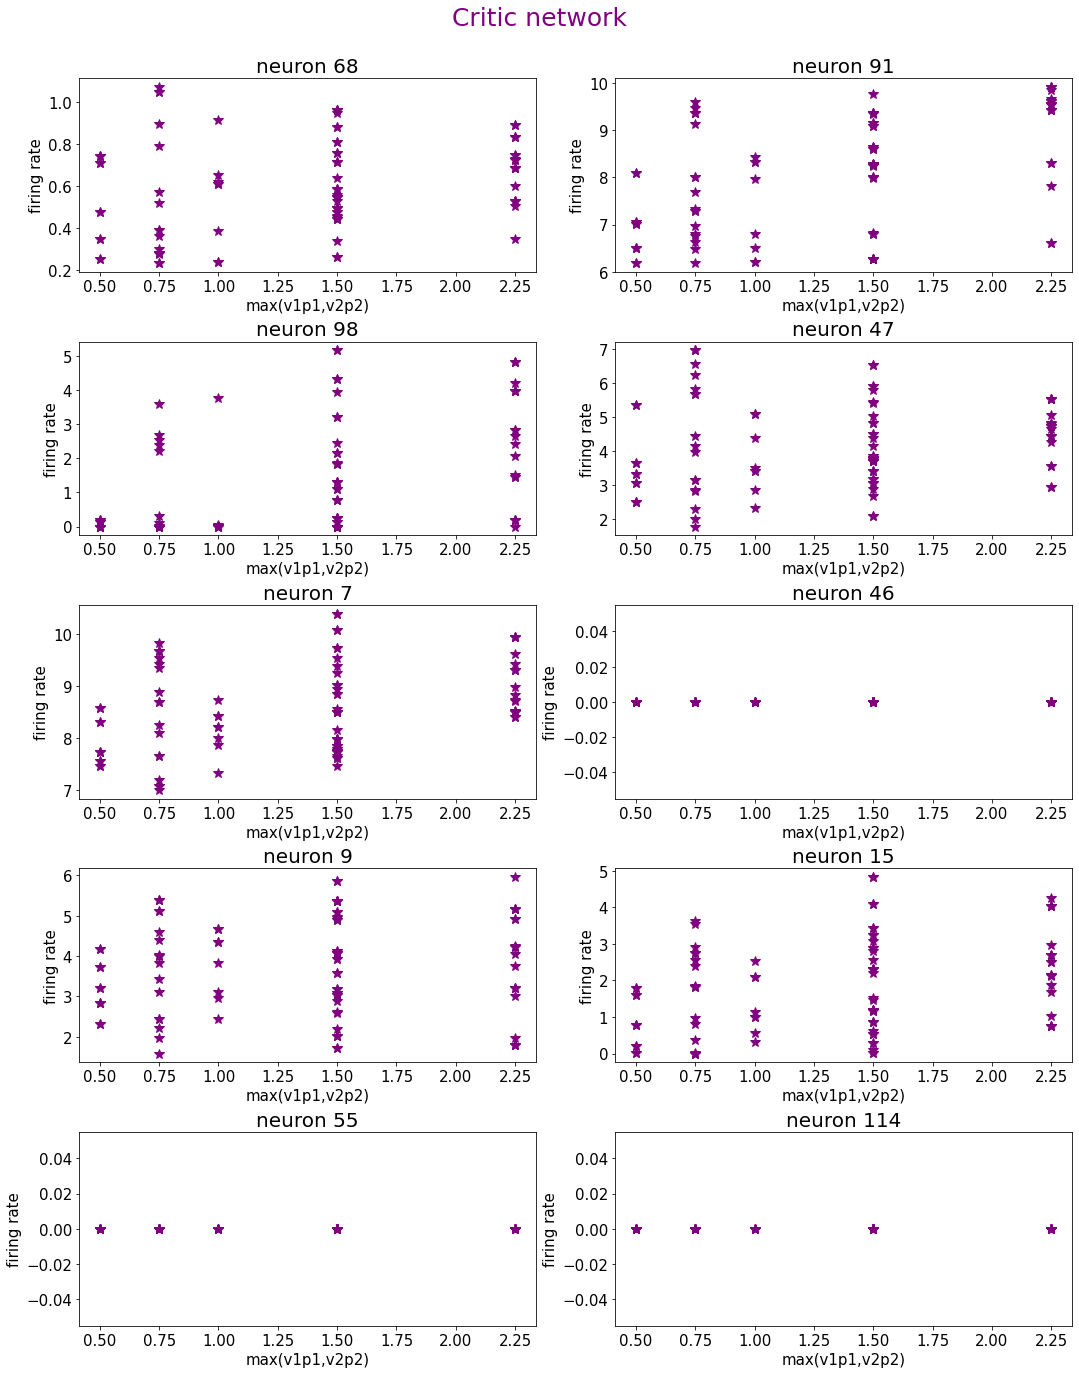

In [10]:
fig, axx = plt.subplots(5, 2, figsize=(15, 20))
axx = axx.reshape(-1)
for n, ax in enumerate(axx):
    for i in range(len(x_values)):
        ax.plot(x_values[i], a_frates_rid[n, i], "*", markersize=10, color="purple")
        #ax.text(x_values[i]+0.03, collection1[n, i], pair[i], fontsize=10)
        ax.set_title("neuron %i" %(relevant_neurons[n]), size=20)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_xlabel("max(v1p1,v2p2)", size=15)
        ax.set_ylabel("firing rate", size=15)
plt.tight_layout()      
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if clsf_on_actor:
    plt.suptitle("Actor network", size=25, color="purple")
    plt.savefig('figures/actor_OVERALLvalue.png')
else:
    plt.suptitle("Critic network", size=25, color="purple")
    plt.savefig('figures/critic_OVERALLvalue.png')

Text(0.5, 1.0, "critic output vs overall trials' values")

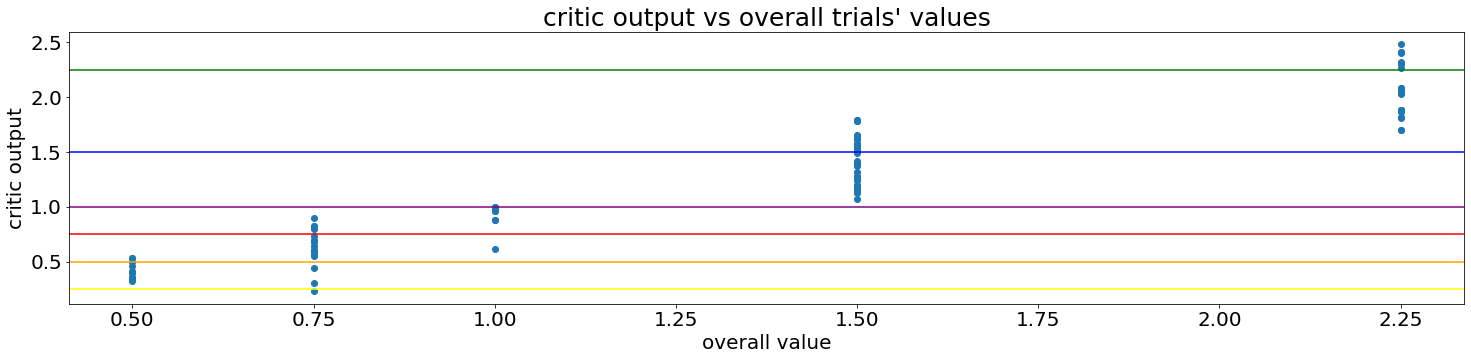

In [9]:
plt.figure(figsize=(25,5))
plt.plot(global_values, time_av_values_col, "o")
plt.axhline(0.25, color="yellow")
plt.axhline(0.5, color="orange")
plt.axhline(0.75, color="red")
plt.axhline(1, color="purple")
plt.axhline(1.5, color="blue")
plt.axhline(2.25, color="green")
plt.xlabel("overall value", size=20)
plt.ylabel("critic output", size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("critic output vs overall trials' values", size=25)

In [22]:
check = True
random_neurons = np.zeros(10)
while check is True:
    random_neurons = np.random.randint(0, 128, 10)
    bool_array = np.isin(random_neurons, relevant_neurons)
    check = any(bool_array)
random_neurons = np.sort(random_neurons)

In [8]:
collection4 = new_vector = np.zeros((len(relevant_neurons), 1))
x_values4 = []
pair4 = []

for i in range(3):
    for j in range(3):
        
        v1 = 1+i
        v2 = 1+j
        p1 = 0.5
        p2 = 0.5
        #print(v1, v2)
        
        x_values4.append(v1*p1-v2*p2)
        pair4.append(str((v1,v2)))
        
        values_probs = np.array([v1, v2, p1, p2])
        v1s = np.array([values_probs[0]])
        v2s = np.array([values_probs[1]])
        p1s = np.array([values_probs[2]])
        p2s = np.array([values_probs[3]])

        reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network_good.pt",
                                  name_load_critic="models/RL_critic_network_good.pt",
                                  v1s=v1s, v2s=v2s, p1s=p1s, p2s=p2s)

        iterations = 100
        observations, rewards, actions, log_action_probs,\
        entropies, values, trial_begins, errors, frates, final_actions = reinforce.experience(iterations)

        a_frates=frates
        a_actions=final_actions
        
        new_vector = np.zeros((len(relevant_neurons), 1))

        a_frates_rid = a_frates[random_neurons]
        a_frates_rid = a_frates_rid.mean(axis=1)
        new_vector[:,0] = a_frates_rid
        collection4 = np.concatenate((collection4, new_vector), axis=1)
        
collection4 = collection4[:, 1:]

iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100
iteration 100


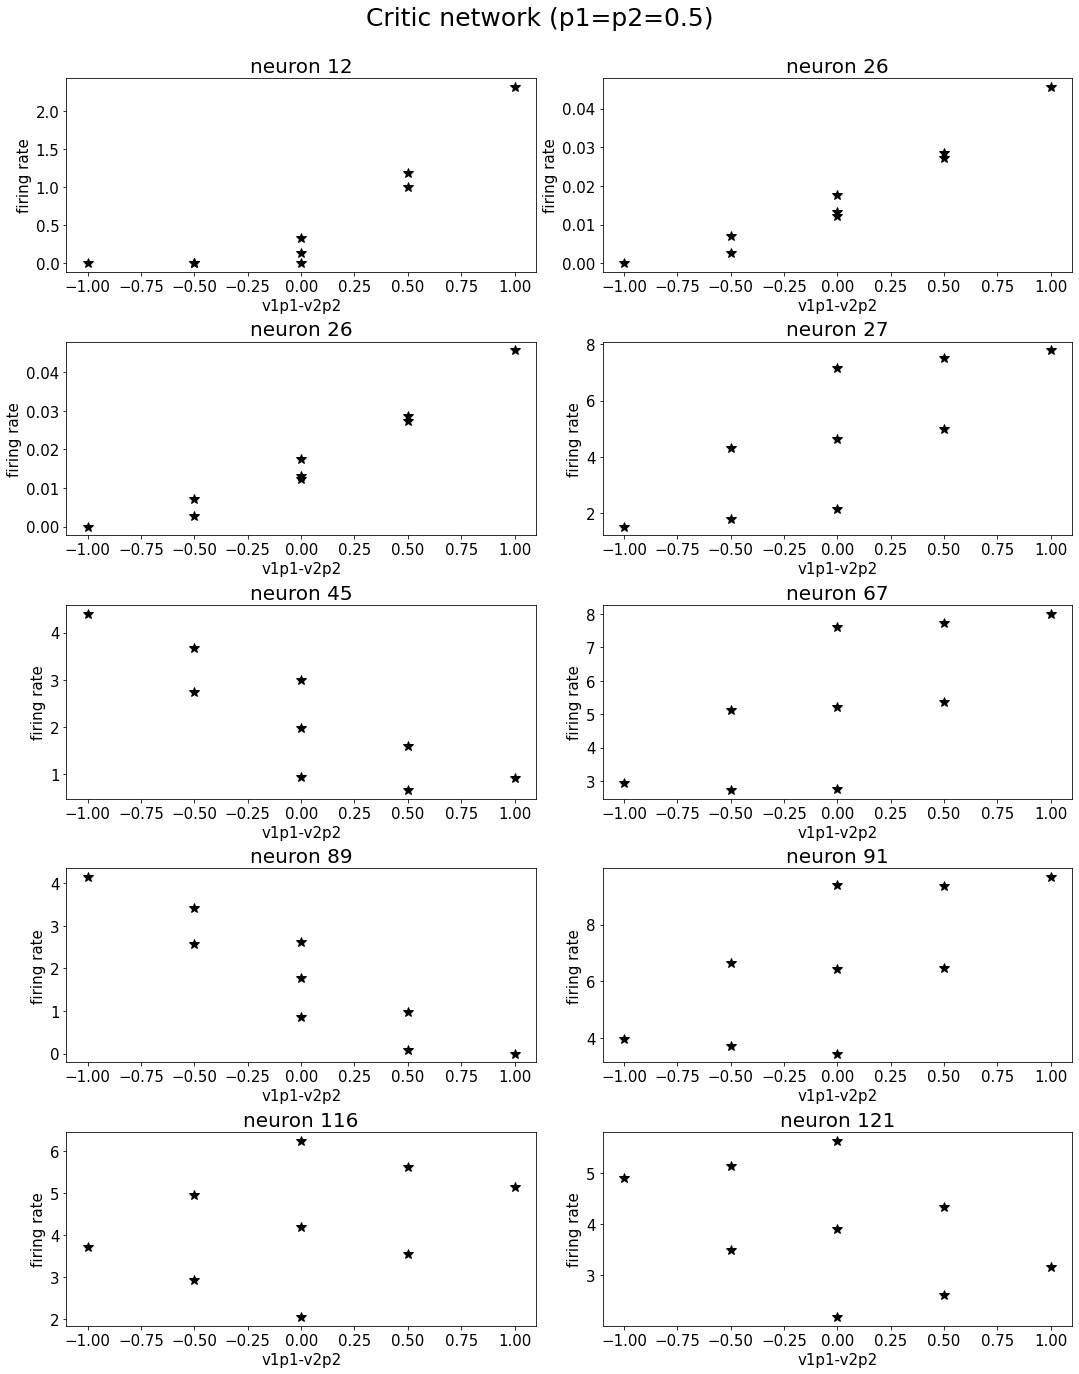

In [9]:
fig, axx = plt.subplots(5, 2, figsize=(15, 20))
axx = axx.reshape(-1)
for n, ax in enumerate(axx):
    for i in range(9):
        ax.plot(x_values4[i], collection4[n, i], "*", markersize=10, color="black")
        #ax.text(x_values4[i]+0.03, collection4[n, i], pair4[i], fontsize=10)
        ax.set_title("neuron %i" %(random_neurons[n]), size=20)
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.set_xlabel("v1p1-v2p2", size=15)
        ax.set_ylabel("firing rate", size=15)
plt.tight_layout()      
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if clsf_on_actor:
    plt.suptitle("Actor network (p1=p2=0.5)", size=25, color="black")
    plt.savefig('figures/actor_p0.5_ACTION_random.png')
else:
    plt.suptitle("Critic network (p1=p2=0.5)", size=25, color="black")
    plt.savefig('figures/critic_p0.5_ACTION_random.png')